# Entendiemento do projeto

* Projeto de previsão de preço de imóvel
* Utilizando as bibliotecas necessárias, ETL e machine learning (árvore de regressão), para um predict 

* Nas etapas abaixo está explicado cada dado da base e cada bloco de código terá uma breve explicação

### Descrição dos dados:
* train.csv - o conjunto de treinamento

* test.csv - o conjunto de teste

* data_description.txt - descrição completa de cada coluna, originalmente preparada por Dean De Cock, mas levemente editada para corresponder aos nomes das colunas usadas aqui

* sample_submission.csv - um envio de benchmark de uma regressão linear no ano e mês de venda, metragem quadrada do lote e número de quartos

### Descrição de cada coluna
#### Campos de dados

Aqui está uma versão resumida do que você encontrará no arquivo de descrição de dados.

SalePrice - o preço de venda da propriedade em dólares. Essa é a variável de destino que você está tentando prever.

MSSubClass: a classe de construção

MSZoning: A classificação geral de zoneamento

LotFrontage: Pés lineares de rua conectados à propriedade

Área do lote: Tamanho do lote em pés quadrados

Rua: Tipo de acesso rodoviário

Beco: Tipo de acesso ao beco

LotShape: Forma geral da propriedade

LandContour: Planicidade da propriedade

Utilitários: Tipo de utilitários disponíveis

LotConfig: Configuração de lote

LandSlope: Inclinação da propriedade

Bairro: Locais físicos dentro dos limites da cidade de Ames

Condição 1: Proximidade com a estrada principal ou ferrovia

Condição 2: Proximidade da estrada principal ou ferrovia (se houver um segundo)

BldgType: Tipo de habitação

HouseStyle: Estilo de habitação

OverallQual: Material geral e qualidade do acabamento

Cond.geral: Classificação geral do estado

Ano de construção: Data de construção original

YearRemodAdd: Data de remodelação

RoofStyle: Tipo de telhado

RoofMatl: Material do telhado

Exterior1º: Revestimento exterior em casa

Exterior2º: Revestimento exterior da casa (se mais do que um material)

MasVnrType: Tipo de folheado de alvenaria

MasVnrArea: Área de folheado de alvenaria em pés quadrados

ExterQual: Qualidade do material exterior

ExterCond: Condição atual do material no exterior

Fundação: Tipo de fundação

BsmtQual: Altura do porão

BsmtCond: Estado geral da cave

BsmtExposição: Paredes do porão no nível do jardim ou walkout

BsmtFinType1: Qualidade da área acabada do porão

BsmtFinSF1: Pés quadrados acabados tipo 1

BsmtFinType2: Qualidade da segunda área concluída (se presente)

BsmtFinSF2: Pés quadrados acabados tipo 2

BsmtUnfSF: Pés quadrados inacabados de área de porão

TotalBsmtSF: Total de pés quadrados de área do porão

Aquecimento: Tipo de aquecimento

HeatingQC: Qualidade e condição de aquecimento

CentralAir: Ar condicionado central 

Elétrica: Sistema elétrico

1ºFlrSF: Pés quadrados do primeiro andar

2ºFlrSF: Pés quadrados do segundo andar

LowQualFinSF: Pés quadrados acabados de baixa qualidade (todos os andares)

GrLivArea: Pés quadrados de área de estar acima do nível (solo)

BsmtFullBath: Banheiros completos no porão

BsmtHalfWash: Lavabos no porão

FullBath: Banheiros completos acima do nível do solo

HalfWash: Lavabos acima do nível

Quarto: Número de quartos acima do nível do porão

Cozinha: Número de cozinhas

KitchenQual: Qualidade da cozinha

TotRmsAbvGrd: Total de quartos acima do nível do solo (não inclui banheiros)

Funcional: Classificação de funcionalidade doméstica

Lareiras: Número de lareiras

FireplaceQu: Qualidade da lareira

Tipo de garagem: Localização da garagem

GarageYrBlt: Ano em que a garagem foi construída

GarageFinish: Acabamento interior da garagem

GarageCars: Tamanho da garagem em capacidade de carro

Área de garagem: Tamanho da garagem em pés quadrados

GarageQual: Qualidade de garagem

GarageCond: Estado da garagem

PavedDrive: Calçada pavimentada

WoodDeckSF: Área de deck de madeira em pés quadrados

OpenPorchSF: Área de varanda aberta em pés quadrados

EnclosedPorch: Área de varanda fechada em pés quadrados

3SsnPorch: Área de varanda de três estações em pés quadrados

ScreenPorch: Área da varanda de tela em pés quadrados

PoolArea: Área da piscina em pés quadrados

PoolQC: Qualidade da piscina

Cerca: Qualidade da cerca

MiscFeature: Recurso diverso não abordado em outras categorias

MiscVal: $Value de recursos diversos

MoSold: Mês de Venda

Ano de Venda: Ano de Venda

TipoDeVenda: Tipo de venda

SaleCondition: Condição de venda

### Importação das Bibliotecas

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

### Importação dos dados

In [55]:
base = pd.read_csv(r'c:\Users\55819\Desktop\House_price\train.csv')
base.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [56]:
# verificando informações das colunas
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Percebe-se que existem muitas colunas com dados NaN, então vamos vizualizar melhor quais são e trata-los

In [57]:
base.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

#### Descrição

* vemos que existem 19 colunas com dados faltantes, então vamos apagar aquelas em que os dados faltantes são maiores que 10% da coluna

In [58]:
# verificando porcentagem de dados faltantes nas colunas

(base.isna().sum() / base.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [59]:
# apagando os dados faltantes maiores que 10%
colunas_ruins = base.columns[(base.isna().sum() / base.shape[0]) > 0.1]
base = base.drop(colunas_ruins,axis=1)

### Como nosso modelo de regressão só é compativel com variaveis numéricas, vamos filtrar elas para uso

In [60]:

colunas = base.columns[base.dtypes != 'object']


In [61]:
# escolhendo todas as linhas das colunas filtradas
base_f = base.loc[:,colunas]
base_f.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


In [62]:
# Verificando valores vazios e substituindo eles por -1 (boa práticas da comunidade)

base_f.isna().sum().sort_values(ascending = False).head(13)

GarageYrBlt      81
MasVnrArea        8
Id                0
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
EnclosedPorch     0
HalfBath          0
3SsnPorch         0
dtype: int64

In [63]:
# substituindo os valores NaN por -1
base_f = base_f.fillna(-1)
base_f.isna().sum().sort_values(ascending = False).head(20)

Id               0
HalfBath         0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
BedroomAbvGr     0
FullBath         0
MSSubClass       0
dtype: int64

#### Todas variáveis numéricas selecionadas, vamos começar a contruir nosso modelo

In [64]:
# separando as variáveis Target

X = base_f.drop(columns='SalePrice')
y = base_f.SalePrice

In [65]:
# separando conjunto de Treino
X_test,X_train,y_test,y_train = train_test_split(X,y,train_size=0.33,random_state=42)

In [66]:
# definindo a arvore
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [72]:
predict_test = clf.predict(X_test)
predict_test

array([465000., 284000., 124500., 130000.,  81000., 144000., 159500.,
       133000., 181000.,  93000., 255500., 170000., 124900., 181000.,
       225000., 145000., 132000., 179900.,  78000., 134432.,  81000.,
       155000., 142000., 132500., 124000., 125500.,  60000., 224000.,
       113000., 235000., 190000., 118000., 465000., 155000., 124000.,
       179900., 225000., 206900., 154900., 119000., 225000., 187100.,
       130500., 132000., 214500., 127000., 303477., 281000., 124500.,
       325000., 132500., 193000., 143000., 164000., 127000., 169990.,
       178000., 311500., 165150., 108000., 275000., 256000., 139000.,
       125000., 501837., 201000., 213500., 135000., 140000., 179900.,
       165000., 215000., 153900., 147000., 230000., 141000., 423000.,
        76500., 153000., 164700., 160000., 165600., 235000., 220000.,
       124900., 129900., 165000., 145000., 139000., 277000., 159000.,
       106000., 119000., 128500., 191000.,  89471., 110000., 154000.,
       350000., 1875

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test,predict_test)
accuracy_score


0.002079002079002079

In [240]:
# como a acurácia ficou muito ruim, vamos fazer algumas alterações
regr_2 = DecisionTreeRegressor(max_depth=8,min_samples_leaf=8)
regr_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=8)

In [241]:
from sklearn.metrics import mean_squared_error

# previsão base teste 
y_train_pred2 = regr_2.predict(X_train)

# Previsões para a base de testes
y_test_pred2 = regr_2.predict(X_test)

# Cálculo do MSE para a base de treino
mse_train2 = mean_squared_error(y_train, y_train_pred2)

# Cálculo do MSE para a base de testes
mse_test2 = mean_squared_error(y_test, y_test_pred2)
print("MSE Treino - Modelo 2: ", mse_train2)
print("MSE Teste - Modelo 2: ", mse_test2)

MSE Treino - Modelo 2:  753350285.6709803
MSE Teste - Modelo 2:  1321145777.5013483


In [242]:
path = regr_2.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
path

{'ccp_alphas': array([0.00000000e+00, 5.42440225e+05, 9.72156848e+05, 1.20470455e+06,
        1.28372324e+06, 1.32340575e+06, 1.69869827e+06, 1.97173798e+06,
        2.17209467e+06, 2.24058918e+06, 2.35467731e+06, 2.39408250e+06,
        2.70689366e+06, 2.70866469e+06, 3.23377022e+06, 3.73915193e+06,
        3.79865737e+06, 3.84464650e+06, 3.85681964e+06, 3.98796918e+06,
        4.14960985e+06, 4.23945062e+06, 4.32456915e+06, 4.39151776e+06,
        4.53723790e+06, 4.62407093e+06, 4.81901853e+06, 5.00489124e+06,
        5.44316504e+06, 5.88585396e+06, 5.89514505e+06, 6.12386217e+06,
        6.21709397e+06, 6.34646464e+06, 7.04492588e+06, 7.17765246e+06,
        7.70642651e+06, 8.14265774e+06, 8.37531584e+06, 8.39759968e+06,
        9.07731511e+06, 9.77139409e+06, 1.00446124e+07, 1.15406514e+07,
        1.17568437e+07, 1.18755435e+07, 1.22392941e+07, 1.33585456e+07,
        1.37395331e+07, 1.38957789e+07, 1.51316350e+07, 1.88763079e+07,
        1.99848684e+07, 2.10021378e+07, 2.12011088

Text(0, 0.5, 'Impureza total das folhas')

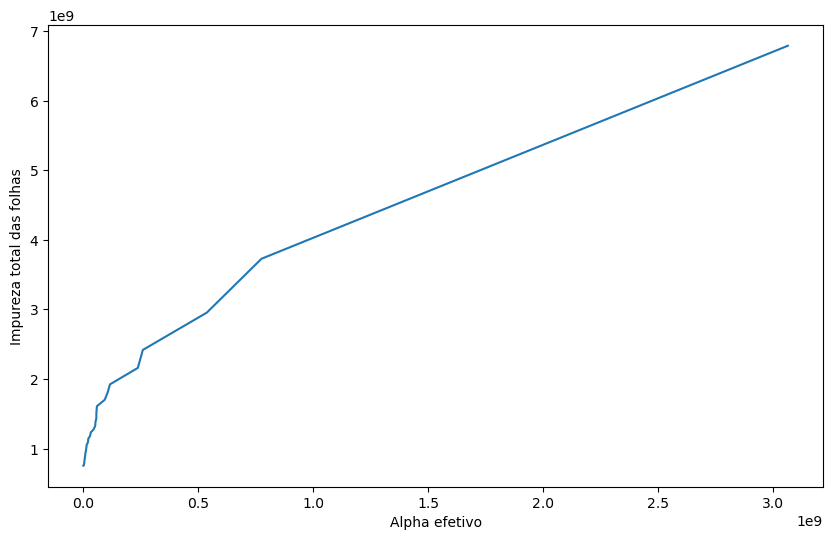

In [243]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [244]:
clfs = []

for ccp_alpha in ccp_alphas:
    regr_2 = DecisionTreeRegressor(random_state=42,ccp_alpha=ccp_alpha,max_depth=8,min_samples_leaf=8)
    regr_2.fit(X_train, y_train)
    clfs.append(regr_2)

In [245]:
train_scores = [regr_2.score(X_train, y_train) for regr_2 in clfs]
test_score = [regr_2.score(X_test, y_test) for regr_2 in clfs]

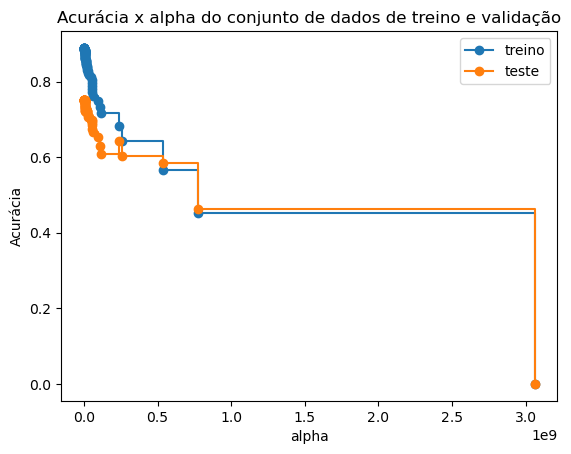

In [246]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
       drawstyle="steps-post")
ax.plot(ccp_alphas, test_score, marker='o', label="teste",
       drawstyle="steps-post")
ax.legend()
plt.show()

In [247]:
ind_melhor_arvore = len(test_score) - test_score[::-1].index(max(test_score)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {test_score[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 75.17


DecisionTreeRegressor(ccp_alpha=1971737.9791641356, max_depth=8,
                      min_samples_leaf=8, random_state=42)

In [248]:
acuracia_teste = melhor_arvore.score(X_test, y_test)
print(f'Acurácia Final é: {acuracia_teste*100:.2f}')

Acurácia Final é: 75.17


### A acurácia melhorou bastante, vamos agora tentar melhorar ainda mais


* Podemos fazer um encurtamento nos ccp_alphas

In [249]:
regr_2 = DecisionTreeRegressor(max_depth=8,min_samples_leaf=8,random_state=42)
regr_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=8, random_state=42)

In [250]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities = path.ccp_alphas,path.impurities


ccp_alphas_reduzidos = ccp_alphas[::20]
ccp_alphas_reduzidos


array([0.00000000e+00, 3.19203269e+01, 1.27681307e+02, 1.83861083e+02,
       5.10725230e+02, 5.10725230e+02, 1.06401090e+03, 1.63602315e+03,
       2.04290092e+03, 2.58554648e+03, 3.19203269e+03, 4.59652707e+03,
       6.12870276e+03, 7.68215867e+03, 9.57609806e+03, 1.22625128e+04,
       1.31696037e+04, 1.66853933e+04, 1.96322778e+04, 2.43113721e+04,
       2.72855975e+04, 3.40483487e+04, 4.35818863e+04, 5.24794774e+04,
       6.47344229e+04, 8.10827375e+04, 1.01537283e+05, 1.24106231e+05,
       1.45047279e+05, 1.71216037e+05, 2.05030984e+05, 2.51631029e+05,
       3.00366020e+05, 3.69975753e+05, 4.61677800e+05, 5.94261892e+05,
       7.20463058e+05, 8.67098838e+05, 1.17036837e+06, 1.48609569e+06,
       1.92628944e+06, 2.90689544e+06, 4.26545125e+06, 6.79578774e+06,
       1.17530702e+07, 3.58847130e+07])

In [251]:
clfs = []
for ccp_alpha in ccp_alphas_reduzidos:
    regr_2 = DecisionTreeRegressor(max_depth=8,min_samples_leaf=8,random_state=42,ccp_alpha=ccp_alpha).fit(X_train,y_train)
    clfs.append(regr_2)


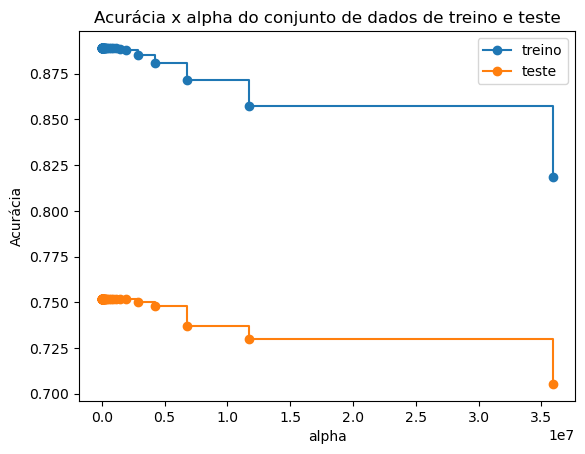

In [252]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas_reduzidos, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas_reduzidos, test_scores, marker='o', label="teste", drawstyle="steps-post")
ax.legend()
plt.show()

In [253]:
# Selecionar a melhor árvore

ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]


print(f'Acurácia da melhor árvore na base de validação: {test_scores[ind_melhor_arvore]*100:.2f}')

acuracia_teste = melhor_arvore.score(X_test, y_test)
print(f'Acurácia Final é: {acuracia_teste*100:.2f}')

Acurácia da melhor árvore na base de validação: 75.16
Acurácia Final é: 75.16


#### O ccp_alpha diminuiu um pouco, vamos tentar outra alternativa

* vamos olhar as 3 melhores variáveis

In [254]:
feature_importances = regr_2.feature_importances_
# Função para encontrar as 3 variáveis mais importantes
def encontrar_3_melhores_vars(feature_importances, feature_names):
    # Criar um DataFrame com os nomes das variáveis e suas importâncias
    df_importances = pd.DataFrame({ 'var': feature_names, 'feature_importances_': feature_importances })
    # Ordenar o DataFrame pelas importâncias das variáveis em ordem decrescente
    df_importances_sorted = df_importances.sort_values(by='feature_importances_', ascending=False)
    # Selecionar as 3 variáveis mais importantes
    top_3_vars = df_importances_sorted.head(3) 
    return top_3_vars
# Encontrar as 3 variáveis mais importantes
top_3_vars = encontrar_3_melhores_vars(feature_importances, X_train.columns)
# Exibir as 3 variáveis mais importantes
print("As 3 variáveis mais importantes:") 
print(top_3_vars)

As 3 variáveis mais importantes:
             var  feature_importances_
3    OverallQual              0.786549
15     GrLivArea              0.095517
20  BedroomAbvGr              0.042568


In [255]:
# Calcular ccp_alphas
top_3_vars = regr_2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = top_3_vars.ccp_alphas, top_3_vars.impurities



In [256]:

clfs = []  
for ccp_alpha in ccp_alphas:
    regr_2 = DecisionTreeRegressor(max_depth=8,min_samples_leaf=8,random_state=42,ccp_alpha=ccp_alpha).fit(X_train,y_train)
    clfs.append(regr_2)

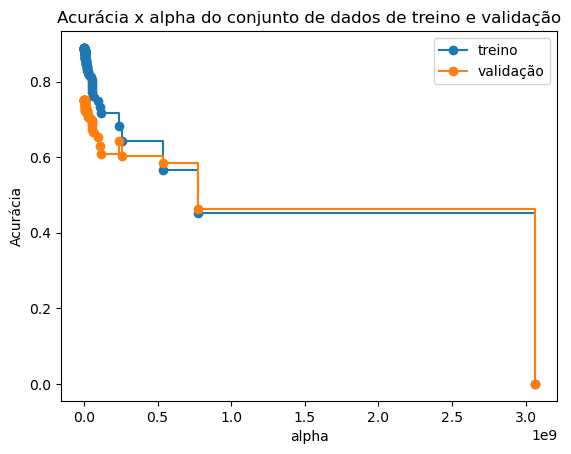

In [257]:
train_scores2 = [regr_2.score(X_train, y_train) for regr_2 in clfs]
test_score2 = [regr_2.score(X_test, y_test) for regr_2 in clfs]


fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores2, marker='o', label="treino",
       drawstyle="steps-post")
ax.plot(ccp_alphas, test_score2, marker='o', label="validação",
       drawstyle="steps-post")
ax.legend()
plt.show()

In [258]:
ind_melhor_arvore = len(test_score) - test_score[::-1].index(max(test_score)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {test_score[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 75.17


DecisionTreeRegressor(ccp_alpha=1971737.9791641356, max_depth=8,
                      min_samples_leaf=8, random_state=42)

In [259]:
teste = pd.read_csv(r'c:\Users\55819\Downloads\test.csv')

In [260]:
colunas_ruins = teste.columns[(teste.isna().sum() / teste.shape[0]) > 0.1]
teste = teste.drop(colunas_ruins,axis=1)

In [261]:
colunas = teste.columns[teste.dtypes != 'object']
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [262]:
teste = teste.fillna(-1)
teste.isna().sum().sort_values(ascending = False).head(20)

Id              0
HeatingQC       0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageType      0
GarageYrBlt     0
GarageFinish    0
dtype: int64

In [263]:
regr_2 = DecisionTreeRegressor(max_depth=8,min_samples_leaf=8,random_state=42)
regr_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=8, random_state=42)

In [264]:
teste= teste.loc[:,colunas]
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1459 non-null   float64
 8   BsmtFinSF1     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1459 non-null   float64
 17  BsmtHalfBath   1459 non-null   float64
 18  FullBath

In [265]:
y_pred = regr_2.predict(teste)

In [266]:
teste['SalePrice'] = y_pred

In [267]:
resultado = teste[['Id','SalePrice']]
resultado

,Id,SalePrice
0,1461,119509.442308
1,1462,159916.666667
2,1463,178055.555556
3,1464,175285.294118
4,1465,181625.000000
...,...,...
1454,2915,66700.000000
1455,2916,86600.578947
1456,2917,159916.666667
1457,2918,119509.442308


In [219]:
resultado.to_csv('resultado.csv',index=False)